In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from copy import deepcopy
import time
from scipy.signal import argrelmax
import scipy.special as sp
import scipy.sparse as sparse
import sys
sys.path.append("../src") 

from Cubic_Newton import Cubic_Newton_NDE

font = {'weight' : 'bold',
        'size'   : 14}

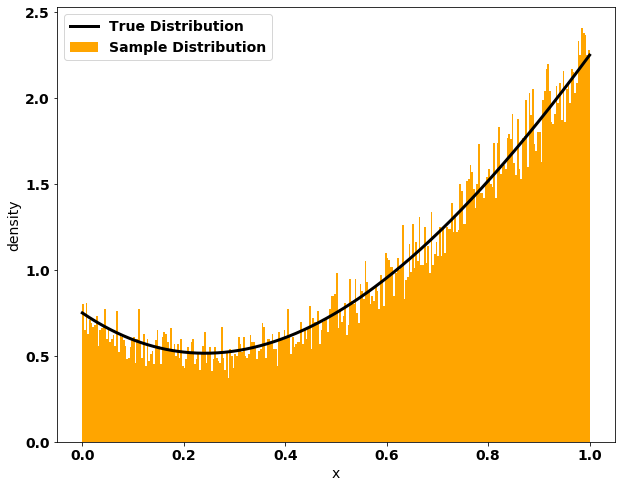

In [2]:

### Simulation: Generate data from beta mixture distribution with M = 5
### For m = 1,...,M
### b_m (x) = ( Gamma(M+1)/ (Gamma(m)*Gamma(M-m+1)) ) * x^{m-1} * (1-x)^{M-m}

n = 30000
N = n
M0 = 5

weights = np.array([0.15, 0.05, 0.1, 0.25, 0.45])

mixture_idx = np.random.choice(M0, size=n, replace=True, p=weights) + 1
samples = np.fromiter((ss.beta.rvs(m, M0-m+1, size=1) for m in mixture_idx),
                   dtype=np.float64)


# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(0, 1, 500)
ys = np.zeros_like(xs)

for m_ in range(M0):
    m = m_ + 1
    ys += ss.beta.pdf(xs, a = m, b= M0-m+1) * weights[m_]
    
    
plt.figure(figsize=(10,8))
plt.rc('font', **font)
plt.plot(xs, ys, linewidth = 3, color='black', label='True Distribution')
plt.hist(samples, density=True, bins=300, color='orange', label='Sample Distribution')
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()

In [3]:
# Formulate B
M = 100
rg_M = [m+1 for m in range(M)]
B = np.array([ ss.beta.pdf(samples, m, M-m+1) for m in rg_M ]).transpose()


In [4]:
## use cubic Newton

M_vertices = 2*M
lam0 = (np.ones(M_vertices)/M_vertices) 
S = np.ones(M_vertices)

w, time_cubic, obj_cubic, FW_iters, lam, S = Cubic_Newton_NDE(Bk = B, 
                                                              shape = "convex", 
                                                              S = S, 
                                                              lam = lam0, 
                                                              c = 1,
                                                              max_iter = 50, 
                                                              FW_max_iter = 2000, 
                                                              tol = 2e-8,
                                                              short_steps = 0,
                                                              logout = True)


# np.savetxt("Output_data_concave/M=%d_N=%d_our_time" % (M, N), time_cubic)
# np.savetxt("Output_data_concave/M=%d_N=%d_our_obj" % (M, N), obj_cubic)
# gap_cubic = (obj_cubic - obj_Mosek)/(max(np.abs(obj_Mosek), 1))
# print("gap_cubic=", gap_cubic)


----------------------------------
k= 0  obj= -0.03267874025476447 FW_iters= 1028
----------------------------------
k= 1  obj= -0.11573421968596327 FW_iters= 502
----------------------------------
k= 2  obj= -0.12612849402839543 FW_iters= 308
----------------------------------
k= 3  obj= -0.12645005826284691 FW_iters= 218
----------------------------------
k= 4  obj= -0.12648305791235762 FW_iters= 481
----------------------------------
k= 5  obj= -0.12648378435275895 FW_iters= 23
----------------------------------
k= 6  obj= -0.12648434212340254 FW_iters= 19
----------------------------------
k= 7  obj= -0.12648541908338437 FW_iters= 48
----------------------------------
k= 8  obj= -0.1264858070986069 FW_iters= 22
----------------------------------
k= 9  obj= -0.12648606248558988 FW_iters= 17
----------------------------------
k= 10  obj= -0.1264943591500763 FW_iters= 720
----------------------------------
k= 11  obj= -0.1264960542055368 FW_iters= 339
---------------------------------

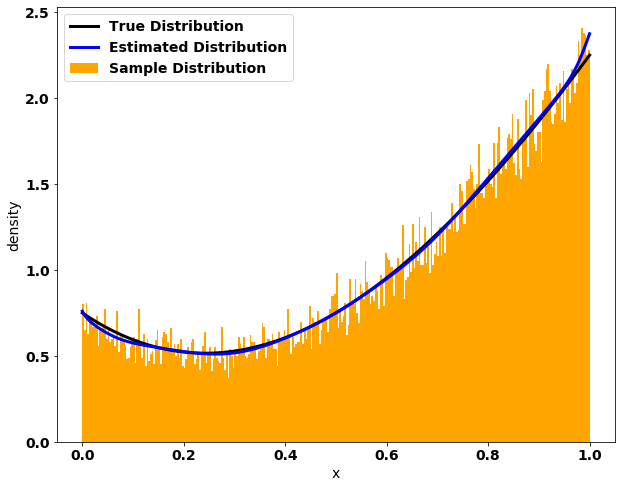

In [5]:

plt.figure(figsize=(10,8))
plt.rc('font', **font)
plt.plot(xs, ys, linewidth = 3, color='black', label='True Distribution')
plt.hist(samples, density=True, bins=300, color='orange', label='Sample Distribution')
g = B.dot(w)
X = samples
plt.plot(X[np.argsort(X)], g[np.argsort(X)], color='blue', linewidth = 3, label='Estimated Distribution')



plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()
